In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df=pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [14]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

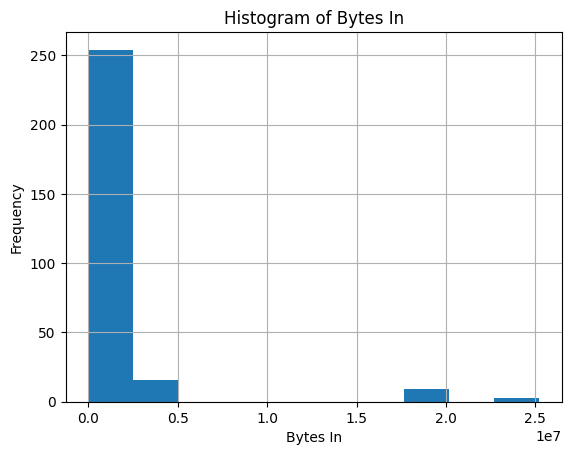

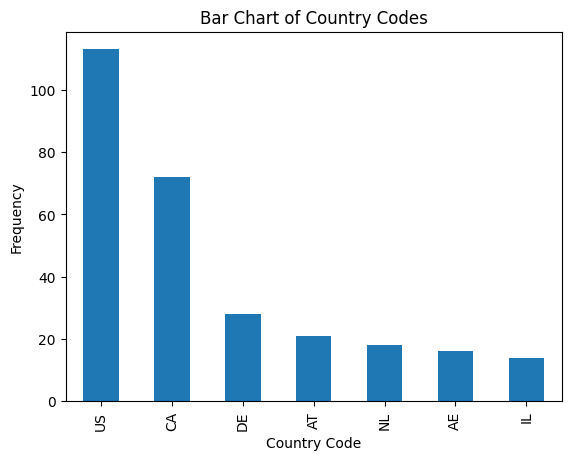

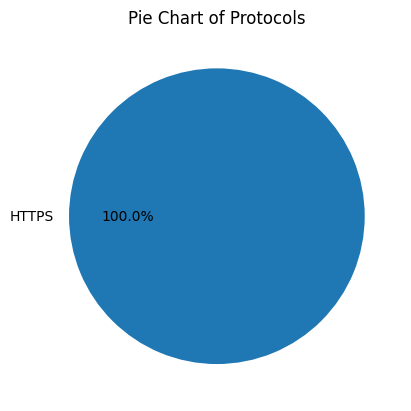

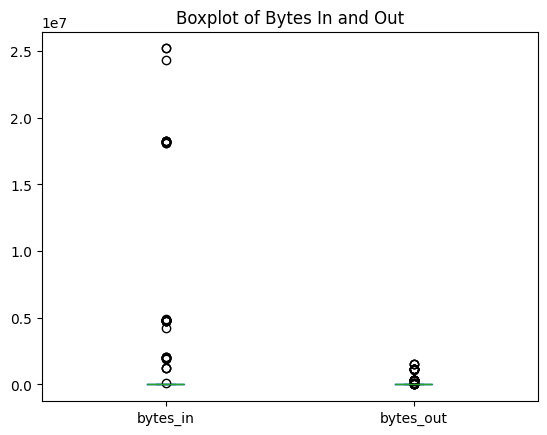

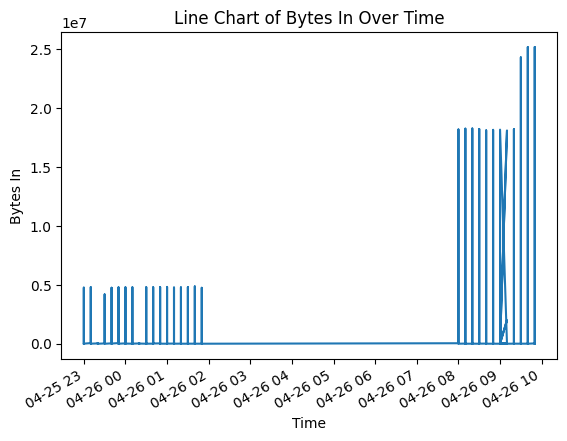

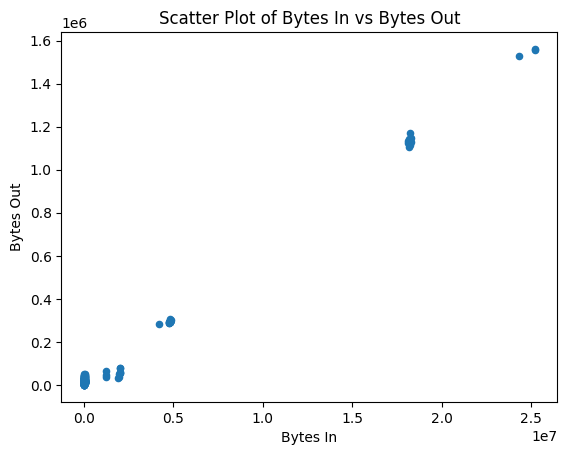

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [15]:


def clean_data(df):
    # 1. Mean, Median, Mode
    mean = df[['bytes_in', 'bytes_out']].mean()
    median = df[['bytes_in', 'bytes_out']].median()
    mode = df[['bytes_in', 'bytes_out']].mode().iloc[0]
    summary_df = pd.DataFrame({'Answer': [mean, median, mode]}, index=['Mean', 'Median', 'Mode'])
    # 2. Min, Max, Range
    min_values = df[['bytes_in', 'bytes_out']].min()
    max_values = df[['bytes_in', 'bytes_out']].max()
    range_values = max_values - min_values
    range_df = pd.DataFrame({'Answer': [min_values, max_values, range_values]}, index=['Min', 'Max', 'Range'])
    # 3. Standard Deviation
    std_dev = df[['bytes_in', 'bytes_out']].std()
    std_dev_df = pd.DataFrame({'Answer': [std_dev]}, index=['Standard Deviation'])
    # 4. Simple Visuals
    # Histogram
    df['bytes_in'].hist(bins=10)
    plt.title('Histogram of Bytes In')
    plt.xlabel('Bytes In')
    plt.ylabel('Frequency')
    plt.show()
    # Bar Chart
    df['src_ip_country_code'].value_counts().plot(kind='bar')
    plt.title('Bar Chart of Country Codes')
    plt.xlabel('Country Code')
    plt.ylabel('Frequency')
    plt.show()
    # Pie Chart
    df['protocol'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Pie Chart of Protocols')
    plt.ylabel('')
    plt.show()
    # Boxplot
    df[['bytes_in', 'bytes_out']].plot(kind='box')
    plt.title('Boxplot of Bytes In and Out')
    plt.show()
    # Line Chart
    df['creation_time'] = pd.to_datetime(df['creation_time'])
    df.set_index('creation_time')['bytes_in'].plot(kind='line')
    plt.title('Line Chart of Bytes In Over Time')
    plt.xlabel('Time')
    plt.ylabel('Bytes In')
    plt.show()
    # Scatter Plot
    df.plot.scatter(x='bytes_in', y='bytes_out')
    plt.title('Scatter Plot of Bytes In vs Bytes Out')
    plt.xlabel('Bytes In')
    plt.ylabel('Bytes Out')
    plt.show()
    return df

# Loaded variable 'df' from URI: d:\CODE\GitHub\-Cybersecurity-Suspicious-Web-Threat-Interactions\CloudWatch_Traffic_Web_Attack.csv
df = pd.read_csv(r'd:\CODE\GitHub\-Cybersecurity-Suspicious-Web-Threat-Interactions\CloudWatch_Traffic_Web_Attack.csv')

df_clean = clean_data(df.copy())
df_clean.head()